# XGBoost

In [1]:
! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 21.3 MB/s eta 0:00:0000:0100:01


In [2]:
CSV_URL = 'https://raw.githubusercontent.com/alura-cursos/classificacao_xgboost/main/Dados/doenca_cardiaca.csv'
SEED = 7

## Aula 1 - Conhecendo os dados

### Importando os dados

In [3]:
import pandas as pd

df = pd.read_csv(CSV_URL)

df.head()

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Doenca cardiaca
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presenca
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Ausencia
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presenca
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Ausencia
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Ausencia


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    270 non-null    int64  
 1   Sexo                     270 non-null    int64  
 2   Tipo dor                 270 non-null    int64  
 3   Pressao arterial         270 non-null    int64  
 4   Colesterol               270 non-null    int64  
 5   Glicemia jejum >120      270 non-null    int64  
 6   Resultados ECG           270 non-null    int64  
 7   Frequencia cardiaca max  270 non-null    int64  
 8   Dor exercicio            270 non-null    int64  
 9   Depressao ST             270 non-null    float64
 10  Inclinacao ST            270 non-null    int64  
 11  Numero vasos fluro       270 non-null    int64  
 12  Teste cintilografia      270 non-null    int64  
 13  Doenca cardiaca          270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.describe()

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


### Exploratory data analysis

In [6]:
import seaborn as sns

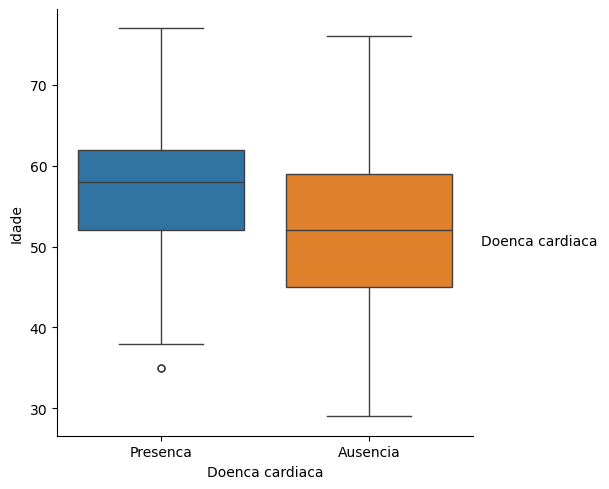

In [7]:
sns.catplot(data=df,
            x='Doenca cardiaca',
            y='Idade',
            hue='Doenca cardiaca',
            kind='box')

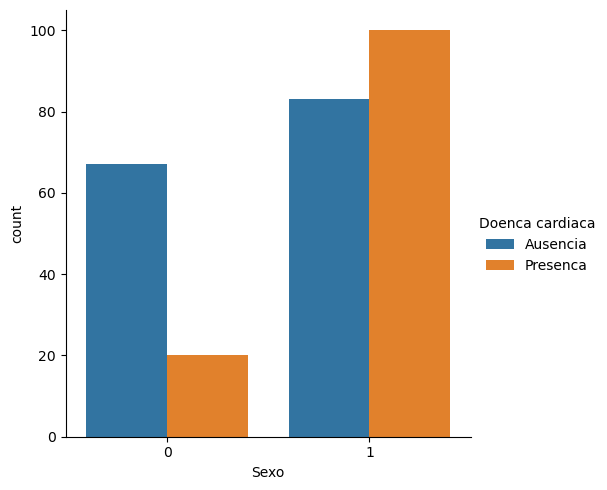

In [8]:
sns.catplot(data=df,
              x='Sexo',
              hue='Doenca cardiaca',
              kind='count')

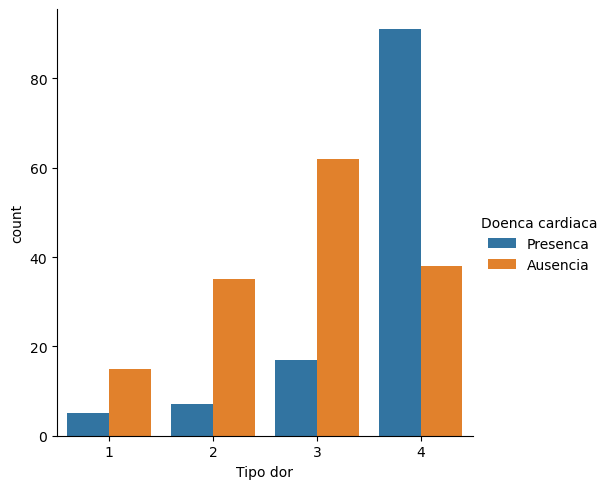

In [9]:
sns.catplot(data=df,
            x='Tipo dor',
            hue='Doenca cardiaca',
            kind='count')

### Data hangling

In [10]:
df['Doenca cardiaca'].value_counts(normalize=True) * 100

Doenca cardiaca
Ausencia    55.555556
Presenca    44.444444
Name: proportion, dtype: float64

In [11]:
df['Doenca cardiaca'] = df['Doenca cardiaca'].map({'Presenca': 1, 'Ausencia': 0})

df.head()

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Doenca cardiaca
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## Aula 2 - Iniciando a classifição

### Separação dos dados

In [12]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

print(X.head())
print(y.head())

   Idade  Sexo  Tipo dor  Pressao arterial  Colesterol  Glicemia jejum >120  \
0     70     1         4               130         322                    0   
1     67     0         3               115         564                    0   
2     57     1         2               124         261                    0   
3     64     1         4               128         263                    0   
4     74     0         2               120         269                    0   

   Resultados ECG  Frequencia cardiaca max  Dor exercicio  Depressao ST  \
0               2                      109              0           2.4   
1               2                      160              0           1.6   
2               0                      141              0           0.3   
3               0                      105              1           0.2   
4               2                      121              1           0.2   

   Inclinacao ST  Numero vasos fluro  Teste cintilografia  
0             

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=.2,
                                                    stratify=y,
                                                    random_state=SEED)

### Modelo básico do XGBoost

In [14]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(objective='binary:logistic')

model_xgb.fit(X_train, y_train)

y_hat = model_xgb.predict(X_test)

#### Avaliando modelo

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
def analyse_model(model, X_test, y_test, y_pred):
    print(classification_report(y_test, y_pred))

    RocCurveDisplay.from_predictions(y_test, y_hat)

    ConfusionMatrixDisplay.from_estimator(model_xgb,
                                          X_test,
                                          y_test,
                                          normalize='true',
                                          cmap='rocket')

              precision    recall  f1-score   support

           0       0.87      0.68      0.76       120
           1       0.68      0.88      0.77        96

    accuracy                           0.76       216
   macro avg       0.78      0.78      0.76       216
weighted avg       0.79      0.76      0.76       216



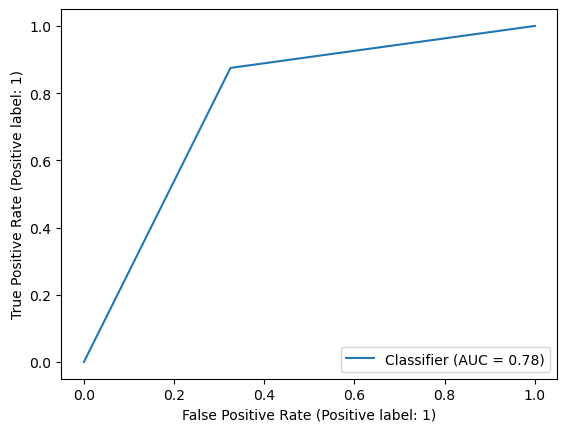

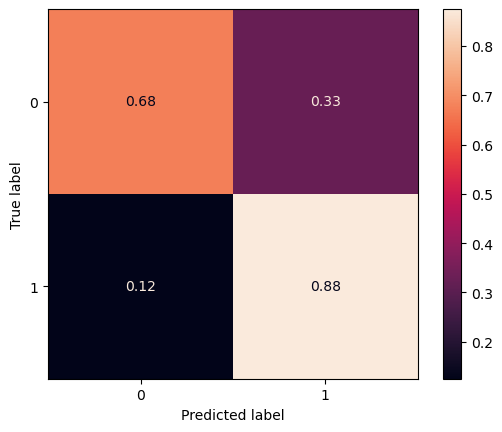

In [17]:
analyse_model(model_xgb, X_test, y_test, y_hat)

## Aula 3 - Realizando a validação cruzada

### Validação cruzada

In [18]:
from xgboost import cv
from xgboost import DMatrix

dmatrix = DMatrix(data=X, label=y)

xboost_params = {'objective': 'binary:logistic'}

xgboost_cv = cv(dtrain=dmatrix,
                params=xboost_params,
                nfold=3,
                num_boost_round=5,
                metrics='error',
                as_pandas=True,
                seed=SEED)

print(f'Acurácia: {((1 - xgboost_cv["test-error-mean"].iloc[-1]) * 100):.2f}')
xgboost_cv

Acurácia: 78.89


,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.122222,0.012001,0.237037,0.041903
1,0.087037,0.005238,0.237037,0.042873
2,0.068519,0.009443,0.248148,0.036665
3,0.061111,0.004536,0.214815,0.018885
4,0.044444,0.013608,0.211111,0.024003


In [19]:
xgboost_cv = cv(dtrain=dmatrix,
                params=xboost_params,
                nfold=3,
                num_boost_round=50,
                metrics='error',
                as_pandas=True,
                seed=SEED)

print(f'Acurácia: {((1 - xgboost_cv["test-error-mean"].iloc[-1]) * 100):.2f}')
xgboost_cv

Acurácia: 78.15


,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.122222,0.012001,0.237037,0.041903
1,0.087037,0.005238,0.237037,0.042873
2,0.068519,0.009443,0.248148,0.036665
3,0.061111,0.004536,0.214815,0.018885
4,0.044444,0.013608,0.211111,0.024003
5,0.038889,0.009072,0.222222,0.009072
6,0.031481,0.014581,0.207407,0.013858
7,0.029630,0.013095,0.203704,0.013858
8,0.020370,0.006929,0.200000,0.015713
9,0.014815,0.010476,0.207407,0.010476


### Utilisando a técnica Early stopping

In [20]:
xgboost_cv = cv(dtrain=dmatrix,
                params=xboost_params,
                nfold=3,
                num_boost_round=100,
                early_stopping_rounds=5,
                metrics='error',
                as_pandas=True,
                seed=SEED)

print(f'Acurácia: {((1 - xgboost_cv["test-error-mean"].iloc[-1]) * 100):.2f}')
xgboost_cv

Acurácia: 80.37


,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.122222,0.012001,0.237037,0.041903
1,0.087037,0.005238,0.237037,0.042873
2,0.068519,0.009443,0.248148,0.036665
3,0.061111,0.004536,0.214815,0.018885
4,0.044444,0.013608,0.211111,0.024003
5,0.038889,0.009072,0.222222,0.009072
6,0.031481,0.014581,0.207407,0.013858
7,0.029630,0.013095,0.203704,0.013858
8,0.020370,0.006929,0.200000,0.015713
9,0.014815,0.010476,0.207407,0.010476


## Aula 4 - Hyperparameters tuning

In [21]:
xboost_params = {'objective': 'binary:logistic',
                 'colsample_bytree': .3,
                 'learning_rate': .1,
                 'max_depth': 5}

xgboost_cv = cv(dtrain=dmatrix,
                params=xboost_params,
                nfold=3,
                num_boost_round=100,
                early_stopping_rounds=5,
                metrics='error',
                as_pandas=True,
                seed=SEED)

print(f'Acurácia: {((1 - xgboost_cv["test-error-mean"].iloc[-1]) * 100):.2f}')
xgboost_cv

Acurácia: 82.96


,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.372222,0.086899,0.403704,0.090873
1,0.248148,0.063559,0.300000,0.045361
2,0.220370,0.061919,0.303704,0.052378
3,0.177778,0.046036,0.270370,0.037771
4,0.153704,0.027716,0.255556,0.027217
5,0.150000,0.016355,0.270370,0.018885
6,0.133333,0.013608,0.233333,0.015713
7,0.120370,0.015930,0.229630,0.013858
8,0.107407,0.018332,0.218519,0.020951
9,0.107407,0.015930,0.214815,0.026189


### Aplicando RandomSearchCV

In [22]:
from sklearn.model_selection import RandomizedSearchCV

rscv_params = {'learning_rate': [.1, .2, .3],
               'max_depth': [2, 4, 6, 8, 10],
               'colsample_bytree': [.1, .5, 1],
               'n_estimators': [10, 25, 50]}

model_xgb = XGBClassifier()

rscv = RandomizedSearchCV(estimator=model_xgb,
                          param_distributions=rscv_params,
                          n_iter=5,
                          cv=4,
                          scoring='accuracy',
                          verbose=1)

rscv.fit(X_train, y_train)

print('Melhores parâmtros: ', rscv.best_params_)
print('Acurácia: ', rscv.best_score_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Melhores parâmtros:  {'n_estimators': 25, 'max_depth': 2, 'learning_rate': 0.2, 'colsample_bytree': 1}
Acurácia:  0.7582417582417583


### Aplicando GridSearchCV

In [23]:
from sklearn.model_selection import GridSearchCV

grid_params = {'learning_rate': [.1, .2, .3],
               'max_depth': [2, 4, 6, 8, 10],
               'colsample_bytree': [.1, .5, 1],
               'n_estimators': [10, 25, 50]}

model_xgb = XGBClassifier()

gridcv = GridSearchCV(estimator=model_xgb,
                      param_grid=rscv_params,
                      cv=4,
                      scoring='accuracy',
                      verbose=1)

gridcv.fit(X, y)

print('Melhores parâmtros: ', gridcv.best_params_)
print('Acurácia: ', gridcv.best_score_)

Fitting 4 folds for each of 135 candidates, totalling 540 fits
Melhores parâmtros:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
Acurácia:  0.8409240561896401


### Aplicando melhores parâmtros do GridSearchCV 

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       120
           1       0.73      0.90      0.80        96

    accuracy                           0.81       216
   macro avg       0.81      0.81      0.81       216
weighted avg       0.82      0.81      0.81       216



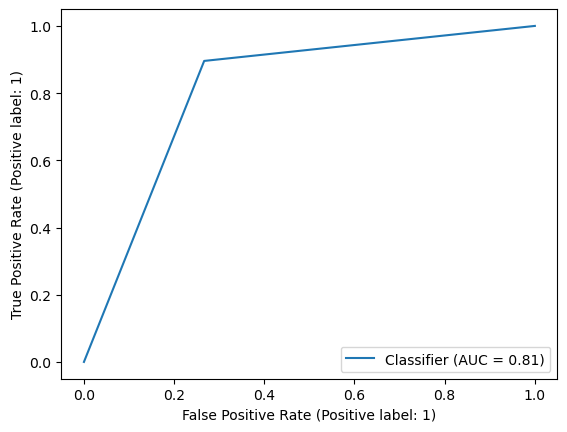

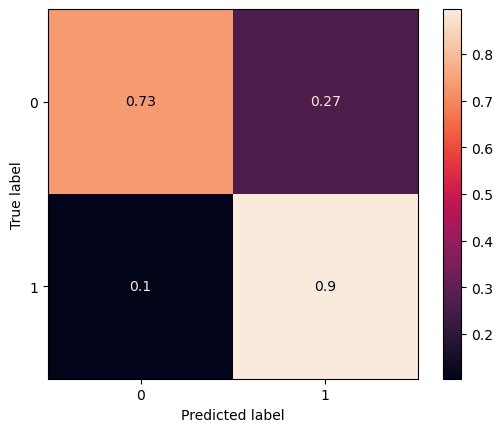

In [24]:
model_xgb = XGBClassifier(objective='binary:logistic',
                                     **gridcv.best_params_)

model_xgb.fit(X_train, y_train)

y_hat = model_xgb.predict(X_test)

analyse_model(model_xgb, X_test, y_test, y_hat)

## Aula 5 - XGBoost e Pipelines

In [25]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('xgboost', XGBClassifier())])

params = {'xgboost__learning_rate': [.1, .2, .3],
          'xgboost__max_depth': [2, 4, 6, 8, 10],
          'xgboost__colsample_bytree': [.1, .5, 1],
          'xgboost__n_estimators': [10, 25, 50]}

gridcv = GridSearchCV(estimator=pipeline,
                      param_grid=params,
                      scoring='accuracy',
                      cv=4,
                      verbose=1)

gridcv.fit(X, y)

print('Melhor acurácia: ', gridcv.best_score_)
print('Melhores parâmtros: ', gridcv.best_params_)

Fitting 4 folds for each of 135 candidates, totalling 540 fits
Melhor acurácia:  0.8409240561896401
Melhores parâmtros:  {'xgboost__colsample_bytree': 1, 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 2, 'xgboost__n_estimators': 50}


### Salvando o modelo treinado

In [26]:
import joblib

joblib.dump(gridcv.best_estimator_, './models/xgboost.pkl')

['./models/xgboost.pkl']

### Carregando o modelo treinado

In [27]:
model_xgb = joblib.load('./models/xgboost.pkl')

In [28]:
CSV_NOVOS_PACIENTES = 'https://raw.githubusercontent.com/alura-cursos/classificacao_xgboost/main/Dados/pacientes_novos.csv'

df_novos = pd.read_csv(CSV_NOVOS_PACIENTES)

df_novos

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia
0,41,1,4,110,172,0,2,158,0,0.0,1,0,7
1,45,0,4,102,265,0,2,122,0,0.6,2,0,3
2,50,1,3,130,246,1,2,173,0,0.0,1,3,3
3,52,0,4,100,248,0,2,122,0,1.0,2,0,3
4,54,0,3,110,214,0,0,158,0,1.6,2,0,3
5,70,0,1,140,239,0,0,151,0,1.8,1,2,3
6,42,0,4,132,341,1,2,136,1,3.0,2,0,7
7,34,0,1,150,283,1,2,162,0,1.0,1,0,3
8,52,1,1,118,186,0,2,190,0,0.0,2,0,6
9,35,1,4,112,245,0,0,150,0,1.0,2,2,3


In [29]:
predictions = model_xgb.predict(df_novos)

predictions

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [30]:
probabilities = model_xgb.predict_proba(df_novos)

probabilities

array([[0.47394192, 0.5260581 ],
       [0.8558974 , 0.14410257],
       [0.73324203, 0.26675797],
       [0.7878467 , 0.21215333],
       [0.95727295, 0.04272704],
       [0.8929907 , 0.10700932],
       [0.09207231, 0.9079277 ],
       [0.8851794 , 0.11482063],
       [0.9037258 , 0.0962742 ],
       [0.20894748, 0.7910525 ]], dtype=float32)

In [31]:
df_novos['Previsoes'] = predictions

df_novos

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Previsoes
0,41,1,4,110,172,0,2,158,0,0.0,1,0,7,1
1,45,0,4,102,265,0,2,122,0,0.6,2,0,3,0
2,50,1,3,130,246,1,2,173,0,0.0,1,3,3,0
3,52,0,4,100,248,0,2,122,0,1.0,2,0,3,0
4,54,0,3,110,214,0,0,158,0,1.6,2,0,3,0
5,70,0,1,140,239,0,0,151,0,1.8,1,2,3,0
6,42,0,4,132,341,1,2,136,1,3.0,2,0,7,1
7,34,0,1,150,283,1,2,162,0,1.0,1,0,3,0
8,52,1,1,118,186,0,2,190,0,0.0,2,0,6,0
9,35,1,4,112,245,0,0,150,0,1.0,2,2,3,1


## Desafio

### Introdução

Agora que você absorveu todo esse conhecimento, estou animada para te apresentar uma atividade prática incrível! O objetivo desta atividade é aplicar e aprimorar todas as habilidades que você adquiriu até agora.

Nesta atividade, vamos trabalhar com um conjunto de dados relacionado ao mesmo tema: doença cardíaca, mas com um desafio adicional! Agora, teremos um dataset com mais colunas e uma quantidade significativa de dados, ultrapassando 300 mil linhas.

Além disso, vamos enfrentar o desafio de lidar com colunas que contêm dados categóricos representados como strings e o desbalanceamento entre as classes. 

Esses dados estão disponíveis no [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease). O conjunto de dados vem originalmente do CDC (Centers for Disease Control and Prevention) e é uma parte importante do Sistema de Vigilância de Fatores de Risco Comportamentais, que realiza pesquisas telefônicas anuais para coletar dados sobre o estado de saúde dos residentes dos Estados Unidos.

Nós vamos trabalhar com os dados coletados em 2020, que estão disponíveis na seguinte [url](https://raw.githubusercontent.com/vqrca/heart_disease/main/Data/heart_2020_cleaned.csv)

A seguir temos uma explicação do que são cada uma das colunas:

* `HeartDisease`: Entrevistados que já relataram ter doença cardíaca coronariana ou infarto do miocárdio.
* `BMI`: Índice de Massa Corporal (IMC).
* `Smoking`: Indica se a pessoa fumou pelo menos 100 cigarros em toda a sua vida? [Nota: 5 maços = 100 cigarros].
* `AlcoholDrinking`: Indicam pessoas do sexo masculino que bebem mais de 14 bebidas por semana e pessoas do sexo feminino que bebem mais de 7 bebidas por semana.
* `Stroke`: Indica se a pessoa já teve um derrame.
* `PhysicalHealth`: Indica o número de dias em que a pessoa teve doenças e lesões físicas nos últimos 30 dias.
* `MentalHealth`: Indica o número de dias em que a pessoa não teve a saúde mental boa nos últimos 30 dias.
* `DiffWalking`: Indica sérias dificuldades para caminhar ou subir escadas.
* `Sex`: Sexo biológico.
* `AgeCategory`: Categoria da idade.
* `Race`: Raça.
* `Diabetic`: Indica se a pessoa tem ou já teve diabetes.
* `PhysicalActivity`: Indica se a pessoa relatou fazer atividade física ou exercício durante os últimos 30 dias além do seu trabalho regular.
* `GenHealth`: Indica como a pessoa considera sua saúde geral.
* `SleepTime`: Média de horas dormidas por dia.
* `Asthma`: Indica se a pessoa tem ou já teve asma.
* `KidneyDisease`: Indica se a pessoa já teve doença renal (Não incluindo cálculos renais, infecção da bexiga ou incontinência).
* `SkinCancer`: Indica se a pessoa tem ou já teve câncer de pele.

Agora que identificamos as variáveis disponíveis e o nosso objetivo de prever a coluna HeartDisease, precisamos seguir algumas etapas importantes:

1. Verificar se temos dados nulos ou duplicados no dataset:

    * Caso existam dados nulos ou duplicados é necessário realizar o tratamento.

2. Transformar Dados de Texto para Numéricos:

    * Para que nosso modelo compreenda os dados, é necessário converter valores do tipo string para valores numéricos.

3. Avaliar o Balanceamento dos Dados:

    * Verificaremos como estão distribuídos os dados entre as classes da coluna `HeartDisease`. Caso exista um desequilíbrio, será necessário desenvolver uma estratégia para balancear essas classes, assegurando que o modelo seja treinado de maneira justa e precisa.

    > Para balancear os dados, uma classe que poderia ser usada é RandomUnderSampler da biblioteca imblearn. Você pode explorar a [documentação dessa biblioteca](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html) e fique à vontade para testar outras classes.

4. Criar um Modelo com XGBClassifier e analisar as métricas de classificação:

    * Utilizaremos o algoritmo XGBClassifier para construir nosso modelo preditivo.

5. Otimizar hiperparâmetros com RandomizedSearchCV e analisar as métricas após o modelo ter sido ajustado:

    * Ajustaremos os hiperparâmetros do nosso modelo para otimizar o desempenho. Isso envolve encontrar a combinação ideal de configurações que maximize a precisão e a generalização do modelo. A ideia é utilizar o RandomizedSearchCV, pois temos um conjunto muito grande de dados e uma busca em grade demandaria muito tempo. 

Seguindo essas etapas, estaremos preparando nossos dados, construindo um modelo e ajustando os hiperparâmetros!

E aí, bora colocar as mãos na massa?

In [81]:
CSV_CHALANGE_URL = 'https://raw.githubusercontent.com/vqrca/heart_disease/main/Data/heart_2020_cleaned.csv'

df_chalange = pd.read_csv(CSV_CHALANGE_URL)

df_chalange.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [46]:
df_chalange.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

In [34]:
df_chalange.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### 1 - Duplicidade de dados

* Verificar se temos dados nulos ou duplicados no dataset:

    * Caso existam dados nulos ou duplicados é necessário realizar o tratamento.

In [38]:
print('Valores duplicados: ', df_chalange.duplicated().sum())

Valores duplicados:  18078


In [39]:
df_chalange.drop_duplicates(inplace=True)

In [41]:
print('Valores duplicados: ', df_chalange.duplicated().sum())

Valores duplicados:  0


### 2 - Transformação dos dados

* Transformar Dados de Texto para Numéricos:

    * Para que nosso modelo compreenda os dados, é necessário converter valores do tipo string para valores numéricos.

In [48]:
df_chalange.info()
df_chalange.head()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### Colunas binárias

In [82]:
# Coluna Sex, mesmo sendo binária pelos dados, será tratada individualmente
binary_columns = ['HeartDisease', 'Smoking', 
                  'AlcoholDrinking', 'Stroke', 
                  'DiffWalking', 'PhysicalActivity', 
                  'Asthma', 'KidneyDisease', 
                  'SkinCancer']

# Confirmar apenas valores de Yes e No
all([len(df_chalange[column].unique()) == 2 for column in binary_columns])

True

In [83]:
df_chalange[binary_columns] = df_chalange[binary_columns].replace({'Yes': 1, 'No': 0})

In [85]:
df_chalange['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [87]:
df_chalange['Sex'] = df_chalange['Sex'].map({'Female': 1, 'Male': 0})

df_chalange.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,White,No,1,Very good,8.0,0,0,0


#### Coluna categóricas não ordinais

In [88]:
categorical_columns = ['Race', 'Diabetic']

for column in categorical_columns:
    print(column, df_chalange[column].unique())

df_chalange = pd.get_dummies(data=df_chalange, 
                             columns=categorical_columns)\
                                .replace({True: 1, False: 0})

df_chalange.head()

Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,...,0,0,0,0,0,1,1,0,0,0


#### Colunas categóricas ordinais

In [89]:
ordered_categorical_columns = ['AgeCategory', 'GenHealth']

for column in ordered_categorical_columns:
    print(column, df_chalange[column].unique())

AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
GenHealth ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [102]:
ordered_categorical_columns_to_categorical = [
    ('AgeCategory', ['18-24', *[f'{i}-{i + 4}' for i in range(25, 76, 5)], '80 or older']),
    ('GenHealth', ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'])
]

for column, categories in ordered_categorical_columns_to_categorical:
    df_chalange[column] = pd.Categorical(df_chalange[column],
                   categories=categories,
                   ordered=True)

df_chalange.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,...,0,0,0,0,0,1,1,0,0,0


In [103]:
df_chalange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   HeartDisease                         319795 non-null  int64   
 1   BMI                                  319795 non-null  float64 
 2   Smoking                              319795 non-null  int64   
 3   AlcoholDrinking                      319795 non-null  int64   
 4   Stroke                               319795 non-null  int64   
 5   PhysicalHealth                       319795 non-null  float64 
 6   MentalHealth                         319795 non-null  float64 
 7   DiffWalking                          319795 non-null  int64   
 8   Sex                                  319795 non-null  int64   
 9   AgeCategory                          319795 non-null  category
 10  PhysicalActivity                     319795 non-null  int64   
 11  

### 3 - Balanceamento dos dados

* Avaliar o Balanceamento dos Dados:

    * Verificaremos como estão distribuídos os dados entre as classes da coluna `HeartDisease`. Caso exista um desequilíbrio, será necessário desenvolver uma estratégia para balancear essas classes, assegurando que o modelo seja treinado de maneira justa e precisa.

    > Para balancear os dados, uma classe que poderia ser usada é RandomUnderSampler da biblioteca imblearn. Você pode explorar a [documentação dessa biblioteca](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html) e fique à vontade para testar outras classes.

In [106]:
! pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 10.0 MB/s eta 0:00:00


In [105]:
df_chalange['HeartDisease'].value_counts(normalize=True) * 100

HeartDisease
0    91.440454
1     8.559546
Name: proportion, dtype: float64

#### Separação dos dados em treino e teste

In [107]:
X, y = df_chalange.drop('HeartDisease', axis=1), df_chalange['HeartDisease']

print(X.head())
print(y.head())

     BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0  16.60        1                0       0             3.0          30.0   
1  20.34        0                0       1             0.0           0.0   
2  26.58        1                0       0            20.0          30.0   
3  24.21        0                0       0             0.0           0.0   
4  23.71        0                0       0            28.0           0.0   

   DiffWalking  Sex  AgeCategory  PhysicalActivity  ...  \
0            0    1        55-59                 1  ...   
1            0    1  80 or older                 1  ...   
2            0    0        65-69                 1  ...   
3            0    1        75-79                 0  ...   
4            1    1        40-44                 1  ...   

  Race_American Indian/Alaskan Native  Race_Asian  Race_Black  Race_Hispanic  \
0                                   0           0           0              0   
1                           

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.3,
                                                    stratify=y,
                                                    random_state=SEED)

#### Balanceamento dos dados de treino

In [114]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=SEED)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

### 4 - Construção do modelo básico

* Criar um Modelo com XGBClassifier e analisar as métricas de classificação:

    * Utilizaremos o algoritmo XGBClassifier para construir nosso modelo preditivo.

#### Modelo treinado com dados desbalanceados (Desastroso)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87727
           1       0.50      0.10      0.17      8212

    accuracy                           0.91     95939
   macro avg       0.71      0.55      0.56     95939
weighted avg       0.89      0.91      0.89     95939



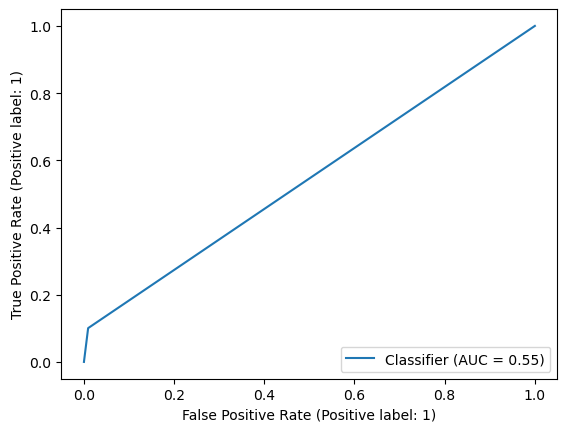

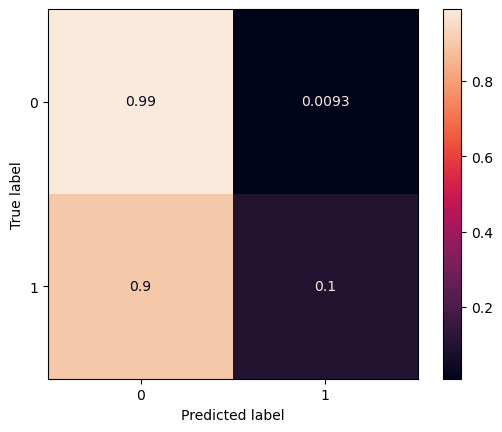

In [117]:
model_xgb = XGBClassifier(objective='binary:logistic',
                          enable_categorical=True)

model_xgb.fit(X_train, y_train)

y_hat = model_xgb.predict(X_test)

analyse_model(model_xgb, X_test, y_test, y_hat)

#### Modelo treinado com dados balanceados

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87727
           1       0.21      0.79      0.34      8212

    accuracy                           0.73     95939
   macro avg       0.59      0.76      0.59     95939
weighted avg       0.91      0.73      0.79     95939



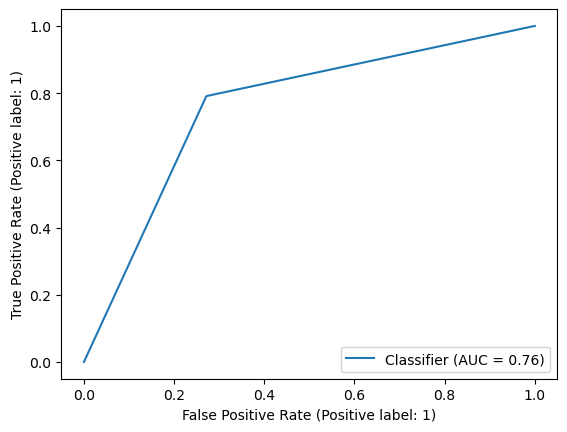

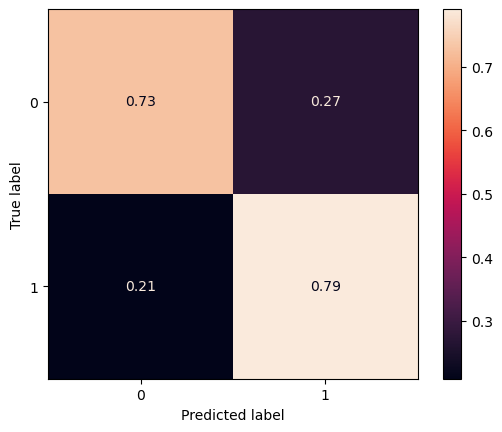

In [116]:
model_xgb = XGBClassifier(objective='binary:logistic',
                          enable_categorical=True)

model_xgb.fit(X_train_resampled, y_train_resampled)

y_hat = model_xgb.predict(X_test)

analyse_model(model_xgb, X_test, y_test, y_hat)

### 5 - Hyperparameter tuning

* Otimizar hiperparâmetros com RandomizedSearchCV e analisar as métricas após o modelo ter sido ajustado:

    * Ajustaremos os hiperparâmetros do nosso modelo para otimizar o desempenho. Isso envolve encontrar a combinação ideal de configurações que maximize a precisão e a generalização do modelo. A ideia é utilizar o RandomizedSearchCV, pois temos um conjunto muito grande de dados e uma busca em grade demandaria muito tempo.

#### Utilizando RandomizedSearchCV

In [121]:
param_distributions = {'learning_rate': [.1, .2, .3],
                       'max_depth': [2, 4, 6, 8, 10, 15, 20],
                       'colsample_bytree': [.1, .5, .1],
                       'n_estimators': [10, 25, 50, 100]}

In [126]:
from sklearn.model_selection import RandomizedSearchCV

model_xgb_rscv = RandomizedSearchCV(
    estimator=XGBClassifier(objective='binary:logistic',
                            enable_categorical=True),
    param_distributions=param_distributions,
    cv=5,
    n_iter=5,
    scoring='accuracy',
    verbose=1)

model_xgb_rscv.fit(X_train_resampled, y_train_resampled)

print('Melhores parâmtros: ', model_xgb_rscv.best_params_)
print('Acurácia: ', model_xgb_rscv.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Melhores parâmtros:  {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
Acurácia:  0.764704605839247


              precision    recall  f1-score   support

           0       0.98      0.73      0.84     87727
           1       0.22      0.81      0.35      8212

    accuracy                           0.74     95939
   macro avg       0.60      0.77      0.59     95939
weighted avg       0.91      0.74      0.79     95939



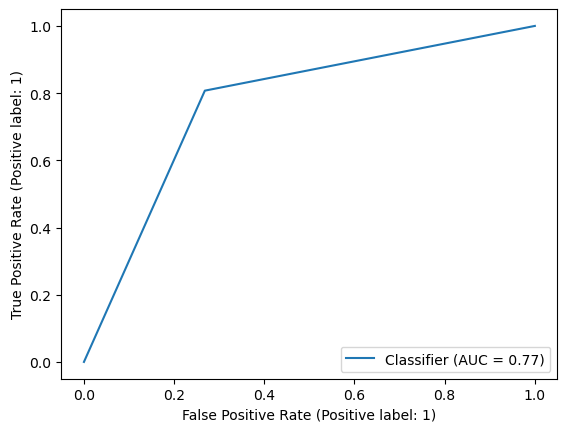

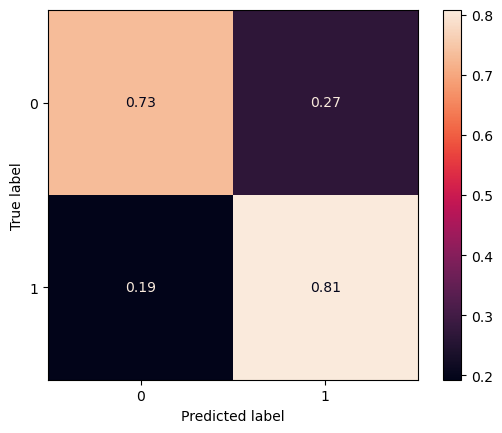

In [127]:
model_xgb = XGBClassifier(objective='binary:logistic',
                          enable_categorical=True,
                          **model_xgb_rscv.best_params_,
                          seed=SEED)

model_xgb.fit(X_train_resampled, y_train_resampled)

y_hat = model_xgb.predict(X_test)

analyse_model(model_xgb, X_test, y_test, y_hat)

#### Utilizando GridSearchCV

In [128]:
param_grid = {'learning_rate': [.1, .2, .3],
              'max_depth': [2, 4, 6, 8, 10, 15, 20],
              'colsample_bytree': [.1, .5, .1],
              'n_estimators': [10, 25, 50, 100]}

In [129]:
from sklearn.model_selection import GridSearchCV

model_xgb_gridcv = GridSearchCV(estimator=XGBClassifier(objective='binary:logistic',
                                                        enable_categorical=True),
                                param_grid=param_grid,
                                cv=5,
                                scoring='accuracy',
                                verbose=1)

model_xgb_gridcv.fit(X_train_resampled, y_train_resampled)

print('Melhores parâmtros: ', model_xgb_gridcv.best_params_)
print('Acurácia: ', model_xgb_gridcv.best_score_)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Melhores parâmtros:  {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 25}
Acurácia:  0.7654091102222912


              precision    recall  f1-score   support

           0       0.98      0.73      0.84     87727
           1       0.22      0.81      0.35      8212

    accuracy                           0.74     95939
   macro avg       0.60      0.77      0.59     95939
weighted avg       0.91      0.74      0.80     95939



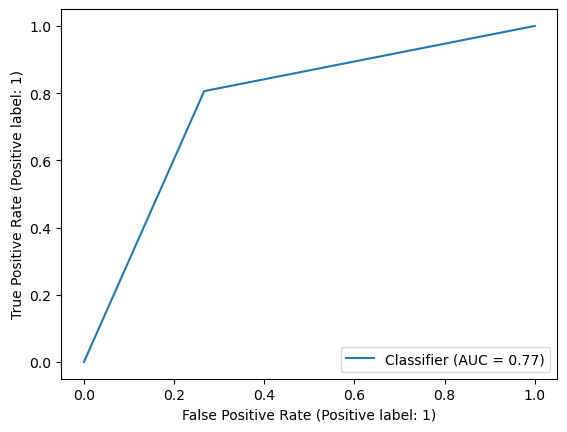

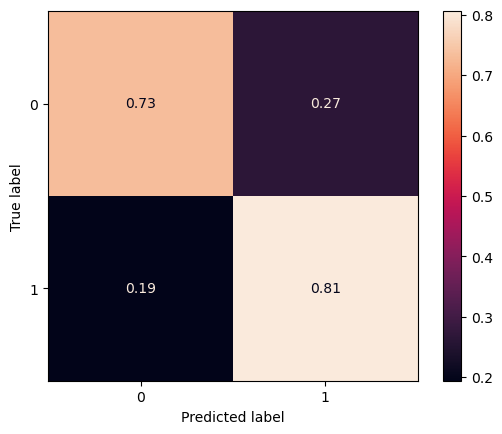

In [130]:
model_xgb = XGBClassifier(objective='binary:logistic',
                          enable_categorical=True,
                          **model_xgb_gridcv.best_params_,
                          seed=SEED)

model_xgb.fit(X_train_resampled, y_train_resampled)

y_hat = model_xgb.predict(X_test)

analyse_model(model_xgb, X_test, y_test, y_hat)